In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import json
from pandas import json_normalize
from pandas.io.json import json_normalize 
from time import sleep

# Data loading

In [2]:
food_data= pd.read_csv('/content/food_coded.csv')

In [3]:
food_data.head()

GPA  Gender  breakfast  calories_chicken  calories_day  calories_scone  \
0    2.4       2          1               430           NaN           315.0   
1  3.654       1          1               610           3.0           420.0   
2    3.3       1          1               720           4.0           420.0   
3    3.2       1          1               430           3.0           420.0   
4    3.5       1          1               720           2.0           420.0   

   coffee                      comfort_food        comfort_food_reasons  \
0       1                              none       we dont have comfort    
1       2       chocolate, chips, ice cream        Stress, bored, anger   
2       2   frozen yogurt, pizza, fast food             stress, sadness   
3       2  Pizza, Mac and cheese, ice cream                     Boredom   
4       2      Ice cream, chocolate, chips   Stress, boredom, cravings    

   comfort_food_reasons_coded  ...  soup  sports  thai_food tortilla_calories  \
0                         9.0  ...   1.0     1.0          1            1165.0   
1                         1.0  ...   1.0     1.0          2             725.0   
2                         1.0  ...   1.0     2.0          5            1165.0   
3                         2.0  ...   1.0     2.0          5             725.0   
4                         1.0  ...   1.0     1.0          4             940.0   

   turkey_calories  type_sports veggies_day  vitamins  waffle_calories  weight  
0              345   car racing           5         1             1315   187.0  
1              690  Basketball            4         2              900   155.0  
2              500         none           5         1              900     NaN  
3              690          NaN           3         1             1315   240.0  
4              500     Softball           4         2              760   190.0  

[5 rows x 61 columns]

In [4]:
food_data.shape

(125, 61)

# Important Data withdrawing

In [5]:
important_features=['cook','diet_current_coded','eating_out','employment','ethnic_food','exercise','fruit_day','income','on_off_campus','pay_meal_out','sports','veggies_day','vitamins']
food_data_imp=food_data[important_features]
food_data_imp.head()

cook  diet_current_coded  eating_out  employment  ethnic_food  exercise  \
0   2.0                   1           3         3.0            1       1.0   
1   3.0                   2           2         2.0            4       1.0   
2   1.0                   3           2         3.0            5       2.0   
3   2.0                   2           2         3.0            5       3.0   
4   1.0                   2           2         2.0            4       1.0   

   fruit_day  income  on_off_campus  pay_meal_out  sports  veggies_day  \
0          5     5.0            1.0             2     1.0            5   
1          4     4.0            1.0             4     1.0            4   
2          5     6.0            2.0             3     2.0            5   
3          4     6.0            1.0             2     2.0            3   
4          4     6.0            1.0             4     1.0            4   

   vitamins  
0         1  
1         2  
2         1  
3         1  
4         2

# Imputing the null values with mode and dropping some of them

In [6]:
food_data_imp.isnull().sum()

cook                   3
diet_current_coded     0
eating_out             0
employment             9
ethnic_food            0
exercise              13
fruit_day              0
income                 1
on_off_campus          1
pay_meal_out           0
sports                 2
veggies_day            0
vitamins               0
dtype: int64

In [7]:
food_data_imp[food_data_imp['income'].isnull()].index

Int64Index([102], dtype='int64')

In [8]:
food_data_imp[food_data_imp['on_off_campus'].isnull()].index

Int64Index([43], dtype='int64')

In [9]:
food_data_imp = food_data_imp.drop(axis=0,index=[102,43])

In [10]:
food_data_imp['cook'].fillna(food_data_imp['cook'].mode()[0], inplace = True)

In [11]:
food_data_imp['sports'].fillna(food_data_imp['sports'].mode()[0], inplace = True)

In [12]:
food_data_imp.isnull().sum()

cook                   0
diet_current_coded     0
eating_out             0
employment             8
ethnic_food            0
exercise              12
fruit_day              0
income                 0
on_off_campus          0
pay_meal_out           0
sports                 0
veggies_day            0
vitamins               0
dtype: int64

# Imputing employment column with values according to KNN Implemention 

In [13]:
data = food_data_imp.drop(['exercise'],axis=1)

test_data = data[data['employment'].isnull()]
train_data = data[data['employment'].notnull()]

X_train = train_data.drop(axis=1,columns='employment')
Y_train = train_data['employment']
X_test = test_data.drop(axis=1,columns='employment')

knn_clf=KNeighborsClassifier()

knn_clf.fit(X_train,Y_train)

ypred=knn_clf.predict(X_test) 

predicted = knn_clf.predict(X_test)

food_data_imp.employment[food_data_imp.employment.isnull()] = predicted

<ipython-input-13-4e4b1a4f68a0>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_data_imp.employment[food_data_imp.employment.isnull()] = predicted


# Imputing exercise column with values according to KNN Implemention

In [14]:
data = food_data_imp

test_data = data[data['exercise'].isnull()]
train_data = data[data['exercise'].notnull()]

X_train = train_data.drop(axis=1,columns='exercise')
Y_train = train_data['exercise']
X_test = test_data.drop(axis=1,columns='exercise')

knn_clf=KNeighborsClassifier()

knn_clf.fit(X_train,Y_train)

ypred=knn_clf.predict(X_test) 

predicted = knn_clf.predict(X_test)

food_data_imp.exercise[food_data_imp.exercise.isnull()] = predicted

<ipython-input-14-c3181b7aa07c>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  food_data_imp.exercise[food_data_imp.exercise.isnull()] = predicted


In [15]:
food_data_imp.isnull().sum()

cook                  0
diet_current_coded    0
eating_out            0
employment            0
ethnic_food           0
exercise              0
fruit_day             0
income                0
on_off_campus         0
pay_meal_out          0
sports                0
veggies_day           0
vitamins              0
dtype: int64

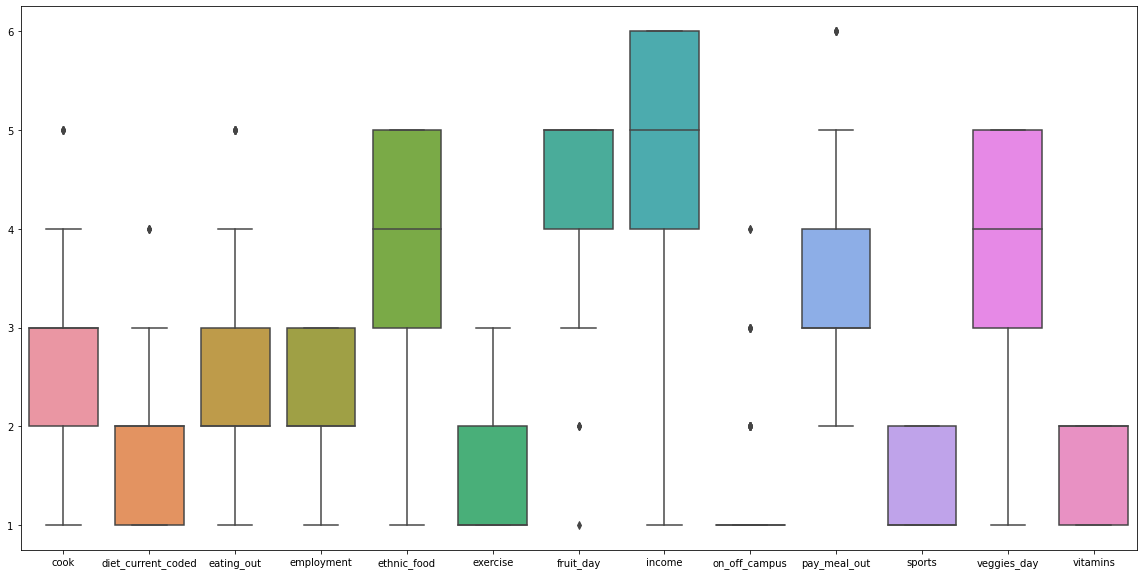

In [16]:
fig, ax = plt.subplots(figsize=(20,10 ))
sns.boxplot(data=food_data_imp,ax=ax)

In [17]:
x = food_data_imp.iloc[:, [7]].values  # here it is considered income as the most important factor to group people

<ipython-input-18-49755f55e7a8>:3: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters = i).fit(x)
<ipython-input-18-49755f55e7a8>:4: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  kmeans.fit(x)
<ipython-input-18-49755f55e7a8>:3: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters = i).fit(x)
<ipython-input-18-49755f55e7a8>:4: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  kmeans.fit(x)
<ipython-input-18-49755f55e7a8>:3: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters = i).fit(x)
<ipython-input-18-49755f55e7a8>:4: Conve

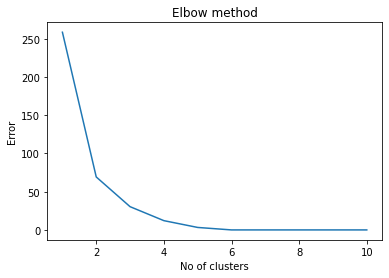

In [18]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
    
plt.plot(range(1,11 ), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [19]:
kmeans2 = KMeans(n_clusters=3)  # By observing above we came to know that 3 is best 
y_kmeans2 = kmeans2.fit_predict(x)
print(y_kmeans2)

kmeans2.cluster_centers_

[0 1 0 0 0 2 1 0 0 1 1 0 0 0 0 1 2 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0
 0 0 0 0 1 0 0 0 1 0 0 1 2 0 0 1 0 1 0 0 0 0 0 1 0 0 2 0 1 0 0 0 1 0 0 0 1
 0 1 1 0 0 1 1 1 2 0 0 0 0 2 1 0 0 1 1 0 0 0 0 0 1 2 0 1 0 1 2 1 0 0 1 0 0
 0 1 0 2 2 1 2 1 2 2 1 0]


array([[5.55405405],
       [3.55555556],
       [1.53846154]])

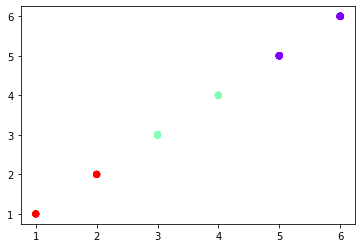

In [20]:
plt.scatter(x[:,0],x[:,0],c=y_kmeans2,cmap='rainbow')


In [21]:
import requests
url = "https://api.foursquare.com/v3/places/search?"
parameters = {'query':'restaurant','ll':'13.0306,77.5649','radius':'3000','limit':'50'}
headers = {"Authorization": "fsq3fcsIMQS31PpzBXWFje54WUC6v+nJy1HC6c1d3eCrTbQ=","Accept": "application/json"}

res = requests.request("GET", url,params = parameters, headers=headers)
result = json.loads(res.content)
print(res.text)

{"results":[{"fsq_id":"4bf0ff0524f020a129a4684f","categories":[{"id":13065,"name":"Restaurant","icon":{"prefix":"https://ss3.4sqi.net/img/categories_v2/food/default_","suffix":".png"}}],"chains":[],"distance":290,"geocodes":{"main":{"latitude":13.030628,"longitude":77.562068},"roof":{"latitude":13.030628,"longitude":77.562068}},"link":"/v3/places/4bf0ff0524f020a129a4684f","location":{"address":"Triveni Road, Mathikere","country":"IN","cross_street":"","formatted_address":"Triveni Road, Mathikere, Bangalore 560057, Karnātaka","locality":"Bangalore","postcode":"560057","region":"Karnātaka"},"name":"Biriyani Paradise","related_places":{},"timezone":"Asia/Kolkata"},{"fsq_id":"4bf7ea5c8d30d13acbb2ff17","categories":[{"id":13199,"name":"Indian Restaurant","icon":{"prefix":"https://ss3.4sqi.net/img/categories_v2/food/indian_","suffix":".png"}}],"chains":[],"distance":230,"geocodes":{"main":{"latitude":13.032711,"longitude":77.56559},"roof":{"latitude":13.032711,"longitude":77.56559}},"link":"

In [22]:

restaurant = []
params = {}
restaurant.extend(result['results'])
sleep(2)
while "next_page_token" in result:
    params['pagetoken'] = result['next_page_token'],
    res = requests.get(url, params1 = params)
    result= json.loads(res.content)
    restaurant.extend(result['results'])
    sleep(2)

In [23]:
print(restaurant)

[{'fsq_id': '4bf0ff0524f020a129a4684f', 'categories': [{'id': 13065, 'name': 'Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/default_', 'suffix': '.png'}}], 'chains': [], 'distance': 290, 'geocodes': {'main': {'latitude': 13.030628, 'longitude': 77.562068}, 'roof': {'latitude': 13.030628, 'longitude': 77.562068}}, 'link': '/v3/places/4bf0ff0524f020a129a4684f', 'location': {'address': 'Triveni Road, Mathikere', 'country': 'IN', 'cross_street': '', 'formatted_address': 'Triveni Road, Mathikere, Bangalore 560057, Karnātaka', 'locality': 'Bangalore', 'postcode': '560057', 'region': 'Karnātaka'}, 'name': 'Biriyani Paradise', 'related_places': {}, 'timezone': 'Asia/Kolkata'}, {'fsq_id': '4bf7ea5c8d30d13acbb2ff17', 'categories': [{'id': 13199, 'name': 'Indian Restaurant', 'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/indian_', 'suffix': '.png'}}], 'chains': [], 'distance': 230, 'geocodes': {'main': {'latitude': 13.032711, 'longitude': 77.56559},

In [24]:
shop_name= []
shop_location = []
shop_lat = []
shop_lon = []
shop_distance=[]
shop_category=[]
shop_long=[]
shop_postcode=[]

for i in range (len (restaurant)):
    shop = restaurant[i]
    try:
        shop_name.append(shop ['name'])
    except:
        shop_name.append('none')
    try:
        shop_location.append(shop ['location']['address'])
    except:
        shop_location.append('none')
    try:
        shop_postcode.append(shop ['location']['postcode'])
    except:
        shop_postcode.append('none')
    try:
        shop_lat.append(shop['geocodes']['main']['latitude'])
    except:
        shop_lat.append('none')
    try:
        shop_long.append(shop['geocodes']['main']['longitude'])
    except:
        shop_long.append('none')
    try:
        shop_distance.append(shop['distance'])
    except:
        shop_distance.append('none')
    try:
        shop_category.append(shop['categories']['name'])
    except:
        shop_category.append('none')

In [25]:
df_dict = {'shop_name':shop_name,'shop_address': shop_location, 'shop_lat':shop_lat ,'shop_lon' :shop_lon}
df_dict1={'shop_name':shop_name,'shop_address': shop_location,'shop_distance':shop_distance,'shop_lat':shop_lat,'shop_long':shop_long,'shop_postcode':shop_postcode}
restaurant_df = pd.DataFrame(df_dict1)
restaurant_df.head()

shop_name                      shop_address  shop_distance  \
0  Biriyani Paradise           Triveni Road, Mathikere            290   
1       Shahi Darbar          Near M.S Ramaiha College            230   
2         The BEL ST                              none            609   
3         Peppermill  Bel Road, 19, Jaladarshni Layout            563   
4  Msrit Campus Cafe                               Msr            111   

    shop_lat  shop_long shop_postcode  
0  13.030628  77.562068        560057  
1  13.032711  77.565590        941735  
2  13.029905  77.570578          none  
3  13.031696  77.569972        560094  
4  13.031578  77.565473        941735

In [26]:
restaurant_df.shape

(50, 6)

In [27]:
url = "https://api.foursquare.com/v3/places/search?"
parameters = {'query':'gym','ll':'13.0306,77.5649','radius':'3000','limit':'50'}
headers = {"Authorization": "fsq3fcsIMQS31PpzBXWFje54WUC6v+nJy1HC6c1d3eCrTbQ=","Accept": "application/json"}
res= requests.request("GET", url,params = parameters, headers=headers)
results1 = json.loads(res.content)
print(res.text)


{"results":[{"fsq_id":"55f52e65498e01edf2d47fdb","categories":[{"id":18021,"name":"Gym and Studio","icon":{"prefix":"https://ss3.4sqi.net/img/categories_v2/building/gym_","suffix":".png"}}],"chains":[],"distance":2834,"geocodes":{"main":{"latitude":13.005484,"longitude":77.568794},"roof":{"latitude":13.005484,"longitude":77.568794}},"link":"/v3/places/55f52e65498e01edf2d47fdb","location":{"address":"Sai Sharan Heights, No 78, 4th Main, 15th Cross, Malleshwaram","country":"IN","cross_street":"","formatted_address":"Sai Sharan Heights, No 78, 4th Main, 15th Cross, Malleshwaram, Bangalore 560055, Karnataka","locality":"Bangalore","postcode":"560055","region":"Karnataka"},"name":"Golds Gym","related_places":{},"timezone":"Asia/Kolkata"},{"fsq_id":"4bfdf729f61dc9b689e09fde","categories":[{"id":18021,"name":"Gym and Studio","icon":{"prefix":"https://ss3.4sqi.net/img/categories_v2/building/gym_","suffix":".png"}}],"chains":[],"distance":2851,"geocodes":{"main":{"latitude":13.009397,"longitude

In [28]:
gym = []
params1 = {}
gym.extend(results1['results'])
sleep(2)
while "next_page_token" in results1:
    params1['pagetoken'] = results1['next_page_token'],
    res1 = requests.get(url, params1 = params1)
    results1 = json.loads(res1.content)
    gym.extend(results1['results'])
    sleep(2)

In [29]:
shop_name_gym= []
shop_location_gym = []
shop_lat_gym= []
shop_lon_gym= []
shop_distance_gym=[]
shop_category_gym=[]
shop_long_gym=[]
shop_postcode_gym=[]

for i in range (len (gym)):
    shop_gym = gym[i]
    try:
        shop_name_gym.append(shop_gym ['name'])
    except:
        shop_name_gym.append('none')
    try:
        shop_location_gym.append(shop_gym['location']['address'])
    except:
        shop_location_gym.append('none')
    try:
        shop_postcode_gym.append(shop_gym ['location']['postcode'])
    except:
        shop_postcode_gym.append('none')
    try:
        shop_lat_gym.append(shop_gym['geocodes']['main']['latitude'])
    except:
        shop_lat_gym.append('none')
    try:
        shop_long_gym.append(shop_gym['geocodes']['main']['longitude'])
    except:
        shop_long_gym.append('none')
    try:
        shop_distance_gym.append(shop_gym['distance'])
    except:
        shop_distance_gym.append('none')
    try:
        shop_category_gym.append(shop_gym['categories']['name'])
    except:
        shop_category_gym.append('none')

In [30]:
df_dict2={'shop_name':shop_name_gym,'shop_address': shop_location_gym,'shop_distance':shop_distance_gym,'shop_lat':shop_lat_gym,'shop_long':shop_long_gym,'shop_postcode':shop_postcode_gym}
gym_df = pd.DataFrame(df_dict2)
gym_df.head(10)

shop_name  \
0                      Golds Gym   
1                   Affinity Gym   
2                      Mbody Gym   
3   Elite Gym And Fitness Center   
4          Crunch Fitness Regime   
5              Gokulam Grand Gym   
6          Gym @ Movenpick Hotel   
7                       Naks Gym   
8    Bhoopsandra Gym And Fitness   
9  Galaxy Club - Brigade Gateway   

                                        shop_address  shop_distance  \
0  Sai Sharan Heights, No 78, 4th Main, 15th Cros...           2834   
1                           5th Cross, Sadashivnagar           2851   
2                                      New Bell Road            370   
3                                               none           1088   
4                No 3, Sapthagiri Janardhan Sun City            594   
5                                               none           1570   
6                                               none           1654   
7                                      1st Main Road           1828   
8                                               none           1845   
9                                             Rajaji           2269   

    shop_lat  shop_long shop_postcode  
0  13.005484  77.568794        560055  
1  13.009397  77.579802          none  
2  13.033055  77.567266          none  
3  13.040327  77.563937        560094  
4  13.031062  77.570242        560094  
5  13.041159  77.555220        560054  
6  13.041750  77.554653          none  
7  13.042144  77.576580        560094  
8  13.041070  77.578196          none  
9  13.011823  77.556904          none

In [31]:
gym_df.shape

(50, 6)

In [32]:
url = "https://api.foursquare.com/v3/places/search?"
parameters = {'query':'grocery+stores','ll':'13.0306,77.5649','radius':'3000','limit':'50'}
headers = {"Authorization": "fsq3fcsIMQS31PpzBXWFje54WUC6v+nJy1HC6c1d3eCrTbQ=","Accept": "application/json"}

respo = requests.request("GET", url,params = parameters, headers=headers)
results2 = json.loads(respo.content)
print(respo.text)

{"results":[{"fsq_id":"4f6577c7e4b0c65cc53f3fbd","categories":[{"id":17069,"name":"Grocery Store / Supermarket","icon":{"prefix":"https://ss3.4sqi.net/img/categories_v2/shops/food_grocery_","suffix":".png"}}],"chains":[],"distance":1230,"geocodes":{"main":{"latitude":13.034732,"longitude":77.575523},"roof":{"latitude":13.034732,"longitude":77.575523}},"link":"/v3/places/4f6577c7e4b0c65cc53f3fbd","location":{"address":"Sanjaynagar","country":"IN","cross_street":"Rajgopal Road","formatted_address":"Sanjaynagar (Rajgopal Road), Bangalore 560094, Karnātaka","locality":"Bangalore","postcode":"560094","region":"Karnātaka"},"name":"Smart","related_places":{},"timezone":"Asia/Kolkata"},{"fsq_id":"4c96e53df7cfa1cd5344ca15","categories":[{"id":17069,"name":"Grocery Store / Supermarket","icon":{"prefix":"https://ss3.4sqi.net/img/categories_v2/shops/food_grocery_","suffix":".png"}}],"chains":[],"distance":1299,"geocodes":{"main":{"latitude":13.037876,"longitude":77.574445},"roof":{"latitude":13.03

In [33]:
grocery = []
params2 = {}
grocery.extend(results2['results'])
sleep(2)
while "next_page_token" in results2:
    params2['pagetoken'] = results2['next_page_token'],
    res2 = requests.get(url, params2 = params2)
    results2 = json.loads(res2.content)
    grocery.extend(results2['results'])
    sleep(2)


In [34]:
shop_name= []
shop_location = []
shop_lat = []
shop_lon = []
shop_distance=[]
shop_category=[]
shop_long=[]
shop_postcode=[]

for i in range (len (grocery)):
    shop = grocery[i]
    try:
        shop_name.append(shop ['name'])
    except:
        shop_name.append('none')
    try:
        shop_location.append(shop ['location']['address'])
    except:
        shop_location.append('none')
    try:
        shop_postcode.append(shop ['location']['postcode'])
    except:
        shop_postcode.append('none')
    try:
        shop_lat.append(shop['geocodes']['main']['latitude'])
    except:
        shop_lat.append('none')
    try:
        shop_long.append(shop['geocodes']['main']['longitude'])
    except:
        shop_long.append('none')
    try:
        shop_distance.append(shop['distance'])
    except:
        shop_distance.append('none')
    try:
        shop_category.append(shop['categories']['name'])
    except:
        shop_category.append('none')

In [35]:
df_dict = {'shop_name':shop_name,'shop_address': shop_location, 'shop_lat':shop_lat ,'shop_lon' :shop_lon}
df_dict3={'shop_name':shop_name,'shop_address': shop_location,'shop_distance':shop_distance,'shop_lat':shop_lat,'shop_long':shop_long,'shop_postcode':shop_postcode}
grocery_df = pd.DataFrame(df_dict3)
grocery_df.head(10)

shop_name                 shop_address  shop_distance  \
0                         Smart                  Sanjaynagar           1230   
1                    Food World      At Rms Bus Stop, Sanjay           1299   
2                 The Bay Store              Tower-6, Pebble           1715   
3          Nano Provision Store                Rmv 2nd Stage           2517   
4   Green's Departmental Stores                        Anand           2817   
5                   Green House                         none           2989   
6           Pallavi Enterprises                         none            460   
7             City Super Market                         none            562   
8  ST. Anthony Provision Stores  211/1, 6th Main Road Gokula            676   
9              Mathikere Market                3rd Main Road            859   

    shop_lat  shop_long shop_postcode  
0  13.034732  77.575523        560094  
1  13.037876  77.574445          none  
2  13.044579  77.571573        560094  
3  13.046798  77.581031        560094  
4  13.029516  77.590972          none  
5  13.025334  77.537940          none  
6  13.027794  77.561775        560054  
7  13.031411  77.570026          none  
8  13.026905  77.559931        560054  
9  13.034195  77.557867        560054

In [36]:
url = "https://api.foursquare.com/v3/places/search?"
parameters = {'ll':'13.0306,77.5649','radius':'3000','limit':'50'}
headers = {"Authorization": "fsq3fcsIMQS31PpzBXWFje54WUC6v+nJy1HC6c1d3eCrTbQ=","Accept": "application/json"}

res3 = requests.request("GET", url, params = parameters,headers=headers)
results3 = json.loads(res3.content)
print(res3.text)
d=pd.json_normalize(results3)

{"results":[{"fsq_id":"4bf0ff0524f020a129a4684f","categories":[{"id":13065,"name":"Restaurant","icon":{"prefix":"https://ss3.4sqi.net/img/categories_v2/food/default_","suffix":".png"}}],"chains":[],"distance":290,"geocodes":{"main":{"latitude":13.030628,"longitude":77.562068},"roof":{"latitude":13.030628,"longitude":77.562068}},"link":"/v3/places/4bf0ff0524f020a129a4684f","location":{"address":"Triveni Road, Mathikere","country":"IN","cross_street":"","formatted_address":"Triveni Road, Mathikere, Bangalore 560057, Karnātaka","locality":"Bangalore","postcode":"560057","region":"Karnātaka"},"name":"Biriyani Paradise","related_places":{},"timezone":"Asia/Kolkata"},{"fsq_id":"4bf7ea5c8d30d13acbb2ff17","categories":[{"id":13199,"name":"Indian Restaurant","icon":{"prefix":"https://ss3.4sqi.net/img/categories_v2/food/indian_","suffix":".png"}}],"chains":[],"distance":230,"geocodes":{"main":{"latitude":13.032711,"longitude":77.56559},"roof":{"latitude":13.032711,"longitude":77.56559}},"link":"

In [37]:
all = []
params3 = {}
all.extend(results3['results'])
sleep(2)
while "next_page_token" in results3:
    params3['pagetoken'] = results3['next_page_token'],
    res3 = requests.get(url, params3 = params3)
    results3 = json.loads(res3.content)
    all.extend(results3['results'])
    sleep(2)


In [38]:
shop_name= []
shop_location = []
shop_lat = []
shop_lon = []
shop_distance=[]
shop_category=[]
shop_long=[]
shop_postcode=[]

for i in range (len (all)):
    shop = all[i]
    try:
        shop_name.append(shop ['name'])
    except:
        shop_name.append('none')
    try:
        shop_location.append(shop ['location']['address'])
    except:
        shop_location.append('none')
    try:
        shop_postcode.append(shop ['location']['postcode'])
    except:
        shop_postcode.append('none')
    try:
        shop_lat.append(shop['geocodes']['main']['latitude'])
    except:
        shop_lat.append('none')
    try:
        shop_long.append(shop['geocodes']['main']['longitude'])
    except:
        shop_long.append('none')
    try:
        shop_distance.append(shop['distance'])
    except:
        shop_distance.append('none')
    try:
        shop_category.append(shop['categories']['name'])
    except:
        shop_category.append('none')

In [39]:
df_dict = {'shop_name':shop_name,'shop_address': shop_location, 'shop_lat':shop_lat ,'shop_lon' :shop_lon}
df_dict4={'shop_name':shop_name,'shop_address': shop_location,'shop_distance':shop_distance,'shop_lat':shop_lat,'shop_long':shop_long,'shop_postcode':shop_postcode}
all_df = pd.DataFrame(df_dict4)
all_df.head(10)

shop_name                                       shop_address  \
0        Biriyani Paradise                            Triveni Road, Mathikere   
1             Shahi Darbar                           Near M.S Ramaiha College   
2               The BEL ST                                               none   
3               Peppermill                   Bel Road, 19, Jaladarshni Layout   
4        Msrit Campus Cafe                                                Msr   
5             Corner House  No. 66, 80 Feet Road, Siddarth Complex, New Be...   
6  Ice N Spice by truffles                       Near Ramaiah Medical College   
7                      KFC       No 117, Shop No 1, Aegs Layout, New Bel Road   
8                    Tangy                            M.S.R.E Road, Mathikere   
9             Kanti Sweets                                 Chandrappa Complex   

   shop_distance   shop_lat  shop_long shop_postcode  
0            290  13.030628  77.562068        560057  
1            230  13.032711  77.565590        941735  
2            609  13.029905  77.570578          none  
3            563  13.031696  77.569972        560094  
4            111  13.031578  77.565473        941735  
5            918  13.027935  77.572928        560094  
6            932  13.028196  77.573153        941735  
7            570  13.032218  77.570077        560054  
8            154  13.030842  77.563545          none  
9            939  13.038974  77.564234        560054

In [40]:
all_df.shape

(50, 6)

In [41]:
all_df.tail(10)

shop_name  \
40                      Have More   
41                  Olives Saloon   
42                Health and Glow   
43  Sri Krishna Bakery and Sweets   
44                      BBMP Park   
45                Café Coffee Day   
46                          Jashn   
47                  Wangs Kitchen   
48                      Starbucks   
49                  Stoned Monkey   

                                         shop_address  shop_distance  \
40                                       New Bel Road           1137   
41                                               none            651   
42                        1 Sl Complex, Rmv 2nd Stage            652   
43  4th Main Road, Krishna Layout, Devarachikkanah...           1317   
44                                     Dollars Colony           1228   
45                                          80Ft Road            962   
46  Plot No 82, 80 Feet Road, R.M.V 2nd Stage, Dol...            942   
47                                       New Bel Road            840   
48                        No.81, 2nd Cross, 80Ft Road           1249   
49                                               none            967   

     shop_lat  shop_long shop_postcode  
40  13.027384  77.574994        560094  
41  13.029577  77.570683          none  
42  13.035010  77.554995        560054  
43  13.038379  77.573975        560076  
44  13.040067  77.570822          none  
45  13.028196  77.573325        560094  
46  13.028261  77.573167        560094  
47  13.027153  77.571908          none  
48  13.027641  77.576251        027578  
49  13.027934  77.573272        027954

In [42]:
venues = results3['results']
dataframe = json_normalize(venues)
dataframe.head()

<ipython-input-42-48223f49d8e5>:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  dataframe = json_normalize(venues)


fsq_id  \
0  4bf0ff0524f020a129a4684f   
1  4bf7ea5c8d30d13acbb2ff17   
2  552011bb498eb4cd79a2d51a   
3  55d05ce3498eb520c2228601   
4  52e76cb3498e4fc148f95ac6   

                                          categories chains  distance  \
0  [{'id': 13065, 'name': 'Restaurant', 'icon': {...     []       290   
1  [{'id': 13199, 'name': 'Indian Restaurant', 'i...     []       230   
2  [{'id': 13236, 'name': 'Italian Restaurant', '...     []       609   
3  [{'id': 13065, 'name': 'Restaurant', 'icon': {...     []       563   
4  [{'id': 13002, 'name': 'Bakery', 'icon': {'pre...     []       111   

                                  link               name      timezone  \
0  /v3/places/4bf0ff0524f020a129a4684f  Biriyani Paradise  Asia/Kolkata   
1  /v3/places/4bf7ea5c8d30d13acbb2ff17       Shahi Darbar  Asia/Kolkata   
2  /v3/places/552011bb498eb4cd79a2d51a         The BEL ST  Asia/Kolkata   
3  /v3/places/55d05ce3498eb520c2228601         Peppermill  Asia/Kolkata   
4  /v3/places/52e76cb3498e4fc148f95ac6  Msrit Campus Cafe  Asia/Kolkata   

   geocodes.main.latitude  geocodes.main.longitude  geocodes.roof.latitude  \
0               13.030628                77.562068               13.030628   
1               13.032711                77.565590               13.032711   
2               13.029905                77.570578               13.029905   
3               13.031696                77.569972                     NaN   
4               13.031578                77.565473               13.031578   

   geocodes.roof.longitude                  location.address location.country  \
0                77.562068           Triveni Road, Mathikere               IN   
1                77.565590          Near M.S Ramaiha College               IN   
2                77.570578                               NaN               IN   
3                      NaN  Bel Road, 19, Jaladarshni Layout               IN   
4                77.565473                               Msr               IN   

  location.cross_street                         location.formatted_address  \
0                        Triveni Road, Mathikere, Bangalore 560057, Kar...   
1   M S Ramaiha College  Near M.S Ramaiha College (M S Ramaiha College)...   
2                                                                Karnataka   
3                        Bel Road, 19, Jaladarshni Layout, Bangalore 56...   
4         Next To Msrit   Msr (Next To Msrit), Bangalore 941735, Karnātaka   

  location.locality location.postcode location.region  \
0         Bangalore            560057       Karnātaka   
1               NaN            941735       Karnātaka   
2               NaN               NaN       Karnataka   
3         Bangalore            560094       Karnataka   
4         Bangalore            941735       Karnātaka   

  location.address_extended  
0                       NaN  
1                       NaN  
2                       NaN  
3                       NaN  
4                       NaN

In [43]:
import folium
#define coordinates of the college
map_bang=folium.Map(location=[13.133521,77.567135],zoom_start=12)
# instantiate a feature group for the incidents in the dataframe
locations = folium.map.FeatureGroup()

latitudes = list(all_df.shop_lat)
longitudes = list( all_df.shop_long)
labels = list(all_df.shop_name)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(map_bang)    
    
# add incidents to map
map_bang.add_child(locations)

map_bang


In [44]:
df_evaluate=all_df[['shop_lat','shop_long']]

In [45]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [71]:
RestList=[]
latitudes = list(all_df.shop_lat)
longitudes = list( all_df.shop_long)
for lat, lng in zip(latitudes, longitudes):    
    
    url = "https://api.foursquare.com/v3/places/search?&ll={},{}&radius=3000&limit=50&query=restaurant".format(lat,lng)

    headers = {"Authorization": "fsq3fcsIMQS31PpzBXWFje54WUC6v+nJy1HC6c1d3eCrTbQ=","Accept": "application/json"}

    respo = requests.request("GET", url, headers=headers)
    resultso = json.loads(respo.content)

    venues = resultso['results']
    # # tranform venues into a dataframe
    dataframe2 = json_normalize(venues)
    filtered_columns = ['name', 'categories'] + [col for col in dataframe2.columns if col.startswith('geocodes.main.')] + ['fsq_id']
    dataframe_filtered2 = dataframe2.loc[:, filtered_columns]
    # # filter the category for each row
    dataframe_filtered2['categories'] = dataframe_filtered2.apply(get_category_type, axis=1)
    # # clean column names by keeping only last term
    dataframe_filtered2.columns = [column.split('.')[-1] for column in dataframe_filtered2.columns]
    RestList.append(dataframe_filtered2['categories'].count())

<ipython-input-71-29bdadca5bd9>:15: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  dataframe2 = json_normalize(venues)


In [70]:
dataframe_filtered2.shape

(40, 5)

In [48]:
df_evaluate['Restaurants']=RestList

<ipython-input-48-be5c8713601c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_evaluate['Restaurants']=RestList


In [61]:
FruitList=[]
latitudes = list(all_df.shop_lat)
longitudes = list( all_df.shop_long)
for lat, lng in zip(latitudes, longitudes):    
  
    url = "https://api.foursquare.com/v3/places/search?&ll={},{}&radius=3000&query=fruit+grocery".format(lat,lng)

    headers = {"Authorization": "fsq3fcsIMQS31PpzBXWFje54WUC6v+nJy1HC6c1d3eCrTbQ=","Accept": "application/json"}

    res5 = requests.request("GET", url, headers=headers)
    results5 = json.loads(res5.content)


    venues = results5['results']
    # # tranform venues into a dataframe
    dataframe3 = json_normalize(venues)
    filtered_columns = ['name', 'categories'] + [col for col in dataframe3.columns if col.startswith('geocodes.main.')] + ['fsq_id']
    dataframe_filtered3 = dataframe3.loc[:, filtered_columns]
    # # filter the category for each row
    dataframe_filtered3['categories'] = dataframe_filtered3.apply(get_category_type, axis=1)
    # # clean column names by keeping only last term
    dataframe_filtered3.columns = [column.split('.')[-1] for column in dataframe_filtered3.columns]
    FruitList.append(dataframe_filtered3['categories'].count())

<ipython-input-61-1b4bc1595296>:16: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  dataframe3 = json_normalize(venues)


In [60]:
dataframe_filtered3.shape

(10, 5)

In [51]:
df_evaluate['Fruits,Vegetables,Groceries']=FruitList

<ipython-input-51-34095c5e34e7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_evaluate['Fruits,Vegetables,Groceries']=FruitList


In [52]:
GymList=[]
latitudes = list(all_df.shop_lat)
longitudes = list( all_df.shop_long)
for lat, lng in zip(latitudes, longitudes):    
  
    url = "https://api.foursquare.com/v3/places/search?&ll={},{}&radius=3000&query=gym".format(lat,lng)

    headers = {"Authorization": "fsq3fcsIMQS31PpzBXWFje54WUC6v+nJy1HC6c1d3eCrTbQ=","Accept": "application/json"}

    res6 = requests.request("GET", url, headers=headers)
    results6 = json.loads(res6.content)


    venues = results6['results']
    # # tranform venues into a dataframe
    dataframe4 = json_normalize(venues)
    filtered_columns = ['name', 'categories'] + [col for col in dataframe3.columns if col.startswith('geocodes.main.')] + ['fsq_id']
    dataframe_filtered4 = dataframe4.loc[:, filtered_columns]
    # # filter the category for each row
    dataframe_filtered4['categories'] = dataframe_filtered4.apply(get_category_type, axis=1)
    # # clean column names by keeping only last term
    dataframe_filtered4.columns = [column.split('.')[-1] for column in dataframe_filtered4.columns]
    GymList.append(dataframe_filtered4['categories'].count())

<ipython-input-52-31ec8712a857>:16: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  dataframe4 = json_normalize(venues)


In [53]:
df_evaluate['gym'] = GymList

<ipython-input-53-58452646c84c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_evaluate['gym'] = GymList


In [54]:
df_evaluate.head(10)

shop_lat  shop_long  Restaurants  Fruits,Vegetables,Groceries  gym
0  13.030628  77.562068           50                           10   10
1  13.032711  77.565590           50                           10   10
2  13.029905  77.570578           50                           10   10
3  13.031696  77.569972           50                           10   10
4  13.031578  77.565473           50                           10   10
5  13.027935  77.572928           50                           10   10
6  13.028196  77.573153           50                           10   10
7  13.032218  77.570077           50                           10   10
8  13.030842  77.563545           50                           10   10
9  13.038974  77.564234           50                           10   10

In [58]:
df_evaluate.shape

(50, 6)

In [55]:
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_evaluate)
df_evaluate['Cluster']=kmeans.labels_
df_evaluate['Cluster']=df_evaluate['Cluster'].apply(str)
df_evaluate.head(10)

shop_lat  shop_long  Restaurants  Fruits,Vegetables,Groceries  gym Cluster
0  13.030628  77.562068           50                           10   10       1
1  13.032711  77.565590           50                           10   10       1
2  13.029905  77.570578           50                           10   10       2
3  13.031696  77.569972           50                           10   10       2
4  13.031578  77.565473           50                           10   10       1
5  13.027935  77.572928           50                           10   10       2
6  13.028196  77.573153           50                           10   10       2
7  13.032218  77.570077           50                           10   10       2
8  13.030842  77.563545           50                           10   10       1
9  13.038974  77.564234           50                           10   10       0

In [ ]:
#define coordinates of the college
map_bang=folium.Map(location=[13.133521,77.567135],zoom_start=12)
# instantiate a feature group for the incidents in the dataframe
locations = folium.map.FeatureGroup()
def color_producer(Cluster):
    if Cluster=='0':
        return 'green'
    elif Cluster=='1':
        return 'orange'
    else:
        return 'red'
latitudes = list(df_evaluate.shop_lat)
longitudes = list( df_evaluate.shop_long)
labels = list(df_evaluate.Cluster)
names=list(all_df.shop_name)
for lat, lng, labels,names in zip(latitudes, longitudes, labels,names):
    folium.CircleMarker(
            [lat,lng],
            fill=True,
            fill_opacity=1,
            popup=folium.Popup(names, max_width = 300),
            radius=5,
            color=color_producer(labels)
        ).add_to(map_bang)  
    
# add incidents to map
map_bang.add_child(locations)

# add incidents to map
map_bang.add_child(locations)

map_bang
